In [1]:
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
encoder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')  # or 'roberta-base' if you want native

In [2]:
posts = pd.read_csv("deeplearning_submissions_controversial_labeled.csv")
posts = posts[~posts['selftext'].isna()]
posts = posts[posts['label'].notna()]
posts['title_selftext'] = posts.apply(
    lambda p: (p['title'] if pd.notnull(p['title']) else '') + ' ' + (p['selftext'] if pd.notnull(p['selftext']) else ''),
    axis=1
)
posts['post_embeddings'] = posts['title_selftext'].map(lambda p: encoder.encode(p))
posts['label'] = posts['label'].str.lower()
print(posts.shape)
posts.head()

(90, 18)


,Unnamed: 0,is_self,num_comments,selftext,url,id,author,link_flair_text,poll_data,upvote_ratio,title,over_18,author_flair_text,locked,score,label,title_selftext,post_embeddings
0,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,Scale Won’t Turn LLMs Into AGI or Superintelli...,False,NaN,False,13,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03..."
1,1,True,19,"We created **Leval-S**, a new way to measure *...",https://www.reddit.com/r/deeplearning/comments...,1kqzha5,LatterEquivalent8478,NaN,NaN,0.50,We benchmarked gender bias across top LLMs (GP...,False,NaN,False,0,negative,We benchmarked gender bias across top LLMs (GP...,"[0.0052795396, -0.08025029, -0.021995582, 0.04..."
2,7,True,7,So here’s the deal: I needed a 3D icon ASAP. N...,https://www.reddit.com/r/deeplearning/comments...,1jdko1z,Creepy_Effective_598,NaN,NaN,0.65,"Almost lost it over a 3D icon, but AI saved th...",False,NaN,False,166,negative,"Almost lost it over a 3D icon, but AI saved th...","[-0.10449125, -0.0026527045, -0.010666771, -0...."
3,9,True,29,"Honestly, using a Mac with Apple Silicon sucks...",https://www.reddit.com/r/deeplearning/comments...,14iid79,luxuryBubbleGum,NaN,NaN,0.54,RANT: I hate Apple Silicon,False,NaN,False,4,negative,"RANT: I hate Apple Silicon Honestly, using a M...","[-0.033601113, -0.07439321, 0.037087034, -0.05..."
4,10,True,45,# How come LLM responds in constant time even ...,https://www.reddit.com/r/deeplearning/comments...,1evuwr6,Difficult-Race-1188,NaN,NaN,0.57,"If you think LLMs can reason and plan, please ...",False,NaN,False,10,negative,"If you think LLMs can reason and plan, please ...","[-0.0140480595, 0.0054782196, -0.0011468532, -..."


In [3]:
comments = pd.read_csv("deeplearning_submissions_comments_controversial.csv")
comments = comments[comments['parent_id'].isin(posts['id'])]
# Derive column depth
comments['depth'] = comments.groupby('parent_id').cumcount() + 1
comments['embeddings'] = comments['body'].map(lambda c: encoder.encode(c))
comments.head()

,Unnamed: 0,id_y,parent_id,score_y,body,depth,embeddings
0,0,ldaipgn,1e3qyxd,69,"There's no actual factual content here, just h...",1,"[-0.07071394, -0.030216975, 0.021154435, 0.002..."
1,1,ld9ybjt,1e3qyxd,41,None of this features any actual scientific cl...,2,"[-0.0051783687, -0.0032895522, 0.018412238, -0..."
2,2,ldaocb4,1e3qyxd,10,How is it possible for this garbage to have 30...,3,"[-0.060968414, -0.070379905, -0.025280824, 0.0..."
3,3,ldam55b,1e3qyxd,9,Your ideas are immature and incomplete with to...,4,"[0.02631399, 0.05668127, 0.0043701353, -0.0719..."
4,4,lda9xol,1e3qyxd,6,That paper reads like an opinion piece rather ...,5,"[-0.15103108, 0.0047795195, -0.013959803, -0.0..."


In [4]:
df_thread = pd.merge(posts, comments, left_on="id", right_on="parent_id")
print(df_thread.shape)
df_thread.head()

(600, 25)


,Unnamed: 0_x,is_self,num_comments,selftext,url,id,author,link_flair_text,poll_data,upvote_ratio,...,label,title_selftext,post_embeddings,Unnamed: 0_y,id_y,parent_id,score_y,body,depth,embeddings
0,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,...,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03...",0,ldaipgn,1e3qyxd,69,"There's no actual factual content here, just h...",1,"[-0.07071394, -0.030216975, 0.021154435, 0.002..."
1,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,...,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03...",1,ld9ybjt,1e3qyxd,41,None of this features any actual scientific cl...,2,"[-0.0051783687, -0.0032895522, 0.018412238, -0..."
2,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,...,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03...",2,ldaocb4,1e3qyxd,10,How is it possible for this garbage to have 30...,3,"[-0.060968414, -0.070379905, -0.025280824, 0.0..."
3,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,...,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03...",3,ldam55b,1e3qyxd,9,Your ideas are immature and incomplete with to...,4,"[0.02631399, 0.05668127, 0.0043701353, -0.0719..."
4,0,True,86,I'm writing a bunch of articles on the topic o...,https://www.reddit.com/r/deeplearning/comments...,1e3qyxd,Difficult-Race-1188,NaN,NaN,0.53,...,negative,Scale Won’t Turn LLMs Into AGI or Superintelli...,"[-0.030923799, -0.055583965, 0.009136942, 0.03...",4,lda9xol,1e3qyxd,6,That paper reads like an opinion piece rather ...,5,"[-0.15103108, 0.0047795195, -0.013959803, -0.0..."


# First baseline: Weighted average of VADER scores across comments 

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df_thread['polarity_score_compound'] = df_thread['body'].map(lambda x: analyzer.polarity_scores(x)['compound'])
print(df_thread['polarity_score_compound'].head())
print(df_thread['polarity_score_compound'].describe())


0    0.1091
1    0.8703
2    0.3612
3   -0.4209
4    0.3612
Name: polarity_score_compound, dtype: float64
count    600.000000
mean       0.251334
std        0.447315
min       -0.940300
25%        0.000000
50%        0.221700
75%        0.624900
max        0.995400
Name: polarity_score_compound, dtype: float64


In [6]:
# posts['vader_weighted_mean'] = 0.0
# for i in range(posts.shape[0]):
#     post_id = posts.iloc[i].id
#     post_comments = comments[comments['parent_id'] == post_id]
#      # Handle edge case to avoid division by zero
#     if post_comments['score_y'].sum() == 0 or post_comments.empty:
#         weighted_mean = 0.0
#     else:
#         weighted_mean = (post_comments['polarity_score_compound'] * post_comments['score_y']).sum() / post_comments['score_y'].sum()
#     posts.at[i, 'vader_weighted_mean'] = weighted_mean
        
# posts['vader_weighted_mean'].describe() 

In [7]:
def safe_weighted_avg(x):
    total_weight = x['score_y'].sum()
    if total_weight == 0:
        return 0.0  # or np.nan, depending on what makes more sense
    return (x['polarity_score_compound'] * x['score_y']).sum() / total_weight

grouped_polarity_weighted = df_thread.groupby('parent_id').apply(safe_weighted_avg, include_groups=False).reset_index(name='weighted_avg_polarity')

grouped_polarity_weighted.describe()

,weighted_avg_polarity
count,90.000000
mean,0.202354
std,0.351492
min,-0.922700
25%,-0.052547
50%,0.270056
75%,0.496862
max,0.883200


In [8]:
# Merge weighted_avg_polarity column
posts = posts.merge(grouped_polarity_weighted, left_on='id', right_on='parent_id', how='left')
posts = posts.drop(columns=['parent_id'])

In [9]:
# Heuristic to convert continuous values into labels
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

posts['sentiment_label'] = posts['weighted_avg_polarity'].apply(classify_sentiment)
posts['sentiment_label'].describe()

count           90
unique           3
top       positive
freq            57
Name: sentiment_label, dtype: object

In [10]:
# Vader Accuracy
sum(posts['label'].str.lower() == posts['sentiment_label'].str.lower())/posts.shape[0]

0.35555555555555557

## Second baseline: Flat RoBERTa + SVM

In [11]:
# Concatenating all comments
comments_grouped = comments.groupby('parent_id')['body'].apply(lambda texts: ' '.join(texts)).reset_index(name='all_comments')
posts = posts.merge(comments_grouped, left_on='id', right_on='parent_id', how='left')
posts = posts.drop(columns=['parent_id'])
# TODO: Add tags f"[POST] {row['title']} {row['selftext']} [COMMENTS] {row['all_comments']}"
posts['full_text'] = posts['title'].fillna('') + ' ' + posts['selftext'].fillna('') + ' ' + posts['all_comments'].fillna('')

In [12]:
# Get embeddings of full text
embeddings = encoder.encode(posts['all_comments'].fillna(''), show_progress_bar=True)



Batches:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(embeddings, posts['label'], test_size=0.2, stratify=posts['label'], random_state=42)

clf = SVC(kernel='linear')  # or 'rbf'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.57      0.80      0.67         5
     neutral       0.60      0.67      0.63         9
    positive       0.00      0.00      0.00         4

    accuracy                           0.56        18
   macro avg       0.39      0.49      0.43        18
weighted avg       0.46      0.56      0.50        18



# Proposed model
# HAN + RoBERTa + vote/depth-aware attention

In [14]:
posts.columns

Index(['Unnamed: 0', 'is_self', 'num_comments', 'selftext', 'url', 'id',
       'author', 'link_flair_text', 'poll_data', 'upvote_ratio', 'title',
       'over_18', 'author_flair_text', 'locked', 'score', 'label',
       'title_selftext', 'post_embeddings', 'weighted_avg_polarity',
       'sentiment_label', 'all_comments', 'full_text'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

# # Suppose `posts` is your dataframe and `labels` is a NumPy array or a column
train_posts, val_posts = train_test_split(posts, test_size=0.2, stratify=posts['label'], random_state=42)

# # Create datasets and loaders
# train_dataset = YourCustomDataset(train_df)
# val_dataset = YourCustomDataset(val_df)

# train_loader = DataLoader(train_dataset, batch_size=..., shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=..., shuffle=False)


In [16]:
def extract_dataset_features(posts, comments):

    def pad_to_max_length(matrix_list, max_len, embed_dim, pad_value=0.0):
        padded = np.full((len(matrix_list), max_len, embed_dim), pad_value, dtype=np.float32)
        for i, mat in enumerate(matrix_list):
            length = min(len(mat), max_len)
            padded[i, :length] = mat[:length]
        return padded
    
    def pad_metadata(meta_list, max_len, pad_value=0.0):
        padded = np.full((len(meta_list), max_len, 1), pad_value, dtype=np.float32)
        for i, m in enumerate(meta_list):
            length = min(len(m), max_len)
            padded[i, :length, 0] = m[:length]
        return padded
    
    # posts['comment_embedding_matrix'] = posts['id'].\
    #     map(lambda p_id: 
    #             np.array(
    #                 [c['embeddings'] for _, c in comments[comments['parent_id'] == p_id].iterrows()]
    #             )
    #        )
    
    
    # Extract comment embeddings into 2D arrays (one per post)
    comments_embeddings_list = [
        np.array([c['embeddings'] for _, c in comments[comments['parent_id'] == post_id].iterrows()])
        for post_id in posts['id']
    ]
    
    # Do the same for scores and depths
    comments_scores_list = [
        np.array([c['score_y'] for _, c in comments[comments['parent_id'] == post_id].iterrows()])
        for post_id in posts['id']
    ]
    
    # posts['comment_scores'] = posts['id'].\
    #     map(lambda p_id: 
    #             np.array(
    #                 [c['score_y'] for _, c in comments[comments['parent_id'] == p_id].iterrows()]
    #             )
    #        )
    
    comments_depths_list = [
        np.array([c['depth'] for _, c in comments[comments['parent_id'] == post_id].iterrows()])
        for post_id in posts['id']
    ]
    
    # posts['comment_depths'] = posts['id'].\
    #     map(lambda p_id: 
    #             np.array(
    #                 [c['depth'] for _, c in comments[comments['parent_id'] == p_id].iterrows()]
    #             )
    #        )
    
    # Max number of comments per post
    max_len = max(len(x) for x in comments_embeddings_list)
    embed_dim = 384  # sentence encoder embedding size
    
    # Padding
    comments_embeddings_padded = pad_to_max_length(comments_embeddings_list, max_len, embed_dim)
    scores_padded = pad_metadata(comments_scores_list, max_len)
    depths_padded = pad_metadata(comments_depths_list, max_len)
    
    # posts['comment_embedding_matrix_padded'] = list(pad_to_max_length(posts['comment_embedding_matrix'], max_len, embed_dim))
    # posts['comments_scores_padded'] = list(pad_metadata(posts['comment_scores'], max_len))
    # posts['comments_depths_padded'] = list(pad_metadata(posts['comment_depths'], max_len))
    # posts['post_embeddings'] = np.stack(posts['post_embeddings'].values)  # assuming this column exists
    
    # Labels
    label_to_id = {
        'negative': 0,
        'neutral': 1,
        'positive': 2
    }
    
    posts['label_id'] = posts['label'].map(label_to_id)
    # Post embeddings as array
    post_embeddings = np.stack(posts['post_embeddings'].values)  # assuming this column exists
    
    labels = posts['label_id'].values  # or 'manual_label' or whatever column you use

    return post_embeddings, comments_embeddings_padded, scores_padded, depths_padded, labels






In [17]:
train_post_embeddings, train_comments_embeddings_padded, train_scores_padded, train_depths_padded, train_labels = extract_dataset_features(train_posts, comments)

val_post_embeddings, val_comments_embeddings_padded, val_scores_padded, val_depths_padded, val_labels = extract_dataset_features(val_posts, comments)

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CommentAttentionWithMetadata(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.attn_weights = nn.Linear(embed_dim + 2, 1)  # +2 for score and depth

    def forward(self, embeddings, scores, depths):
        # embeddings: (batch_size, seq_len, embed_dim)
        # scores, depths: (batch_size, seq_len, 1)
        x = torch.cat([embeddings, scores, depths], dim=-1)  # shape: (batch, seq, embed+2)
        attn_logits = self.attn_weights(x).squeeze(-1)  # shape: (batch, seq)
        attn_weights = torch.softmax(attn_logits, dim=1)
        context = torch.sum(embeddings * attn_weights.unsqueeze(-1), dim=1)
        return context, attn_weights


In [39]:
class HANWithCommentMetadata(nn.Module):
    def __init__(self, embed_dim, num_classes):
        super().__init__()
        self.attn = CommentAttentionWithMetadata(embed_dim)
        self.classifier = nn.Linear(embed_dim + embed_dim, num_classes)  # post + comment vector

    def forward(self, post_embed, comment_embeds, scores, depths):
        # All tensors should be batched (batch_size, ...)
        comment_context, _ = self.attn(comment_embeds, scores, depths)
        combined = torch.cat([post_embed, comment_context], dim=-1)
        output = self.classifier(combined)
        return output

In [40]:
# import torch
# from torch.utils.data import Dataset, DataLoader

# class RedditHANData(Dataset):
#     def __init__(self, df):
#         self.post_embeddings = torch.tensor(df['post_embeddings'].tolist(), dtype=torch.float32)
#         self.comment_embeddings = torch.tensor(df['comment_embedding_matrix_padded'], dtype=torch.float32)
#         self.scores = torch.tensor(df['comments_scores_padded'], dtype=torch.float32)
#         self.depths = torch.tensor(df['comments_depths_padded'], dtype=torch.float32)
#         self.labels = torch.tensor(df['label_id'], dtype=torch.long)

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         return (self.post_embeddings[idx],
#                 self.comment_embeddings[idx],
#                 self.scores[idx],
#                 self.depths[idx],
#                 self.labels[idx])

# # Create DataLoaders
# dataset = RedditHANData(posts)
# train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader

class RedditHANData(Dataset):
    def __init__(self, post_embeddings, comment_embeddings, scores, depths, labels):
        self.post_embeddings = torch.tensor(post_embeddings, dtype=torch.float32)
        self.comment_embeddings = torch.tensor(comment_embeddings, dtype=torch.float32)
        self.scores = torch.tensor(scores, dtype=torch.float32)
        self.depths = torch.tensor(depths, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return (self.post_embeddings[idx],
                self.comment_embeddings[idx],
                self.scores[idx],
                self.depths[idx],
                self.labels[idx])

# Create DataLoaders
train_dataset = RedditHANData(train_post_embeddings, train_comments_embeddings_padded, 
                        train_scores_padded, train_depths_padded, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = RedditHANData(val_post_embeddings, val_comments_embeddings_padded, 
                        val_scores_padded, val_depths_padded, val_labels)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)


In [42]:
import torch.nn as nn
import torch.optim as optim

model = HANWithCommentMetadata(embed_dim=384, num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [46]:
import matplotlib.pyplot as plt


train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []


num_epochs = 10
for epoch in range(num_epochs):
    # ------- TRAIN -------
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for post_embeds, comments_embeds_matrix, scores, depths, labels in train_loader:
        optimizer.zero_grad()
        out = model(post_embeds, comments_embeds_matrix, scores, depths)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Training accuracy
        preds = out.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = total_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # -------- VALIDATION --------
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for post_embeds, comments_embeds_matrix, scores, depths, labels in val_loader:
            out = model(post_embeds, comments_embeds_matrix, scores, depths)
            loss = criterion(out, labels)
            val_loss += loss.item()

            preds = out.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
        val_acc = correct / total

    val_loss = val_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

Epoch 1: Loss = 2.8469
Epoch 2: Loss = 2.8973
Epoch 3: Loss = 2.7805
Epoch 4: Loss = 2.8284
Epoch 5: Loss = 2.6923
Epoch 6: Loss = 2.6391
Epoch 7: Loss = 2.6161
Epoch 8: Loss = 2.6786
Epoch 9: Loss = 2.7124
Epoch 10: Loss = 2.6238


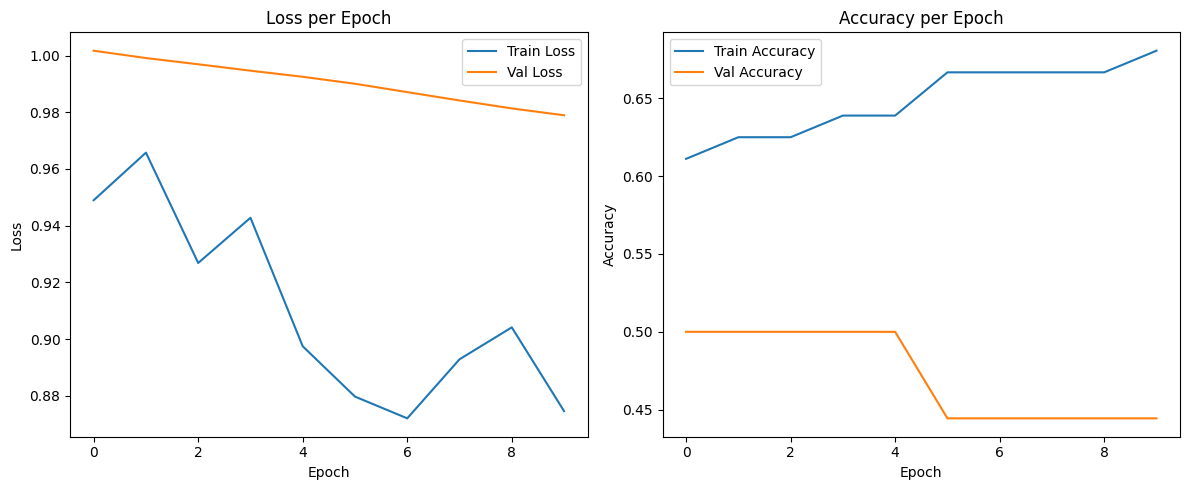

In [47]:
# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import classification_report

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for post, comments, scores, depths, label in val_loader:  # use test_loader if split
        outputs = model(post, comments, scores, depths)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         5
     neutral       0.47      0.89      0.62         9
    positive       0.00      0.00      0.00         4

    accuracy                           0.44        18
   macro avg       0.16      0.30      0.21        18
weighted avg       0.24      0.44      0.31        18



/home/mateus/data_science_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mateus/data_science_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mateus/data_science_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le